In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('WeeklyReturn.csv', index_col = 'Date')
Cov = df.cov()
exprtn = df.mean()
Cov_inv = pd.DataFrame(np.linalg.pinv(Cov.values), Cov.columns, Cov.index)
A = float(Cov_inv.dot(exprtn).sum())
B = float(exprtn.dot(Cov_inv).dot(exprtn))
C = float(Cov_inv.sum(axis = 1).sum())
D = B * C - A ** 2

In [25]:
h = Cov_inv.dot((B - A * exprtn) / D)
g = Cov_inv.dot((C * exprtn - A) / D)
mu = [-0.007 + i * 0.0005 for i in range(33)]
weight = pd.DataFrame()
for i in range(len(mu)):
    weight = pd.concat([weight, h + g * mu[i]], axis = 1)

In [26]:
exprtn.dot(weight)

0   -7.000000e-03
0   -6.500000e-03
0   -6.000000e-03
0   -5.500000e-03
0   -5.000000e-03
0   -4.500000e-03
0   -4.000000e-03
0   -3.500000e-03
0   -3.000000e-03
0   -2.500000e-03
0   -2.000000e-03
0   -1.500000e-03
0   -1.000000e-03
0   -5.000000e-04
0    5.475221e-18
0    5.000000e-04
0    1.000000e-03
0    1.500000e-03
0    2.000000e-03
0    2.500000e-03
0    3.000000e-03
0    3.500000e-03
0    4.000000e-03
0    4.500000e-03
0    5.000000e-03
0    5.500000e-03
0    6.000000e-03
0    6.500000e-03
0    7.000000e-03
0    7.500000e-03
0    8.000000e-03
0    8.500000e-03
0    9.000000e-03
dtype: float64

Text(0, 0.5, 'mu')

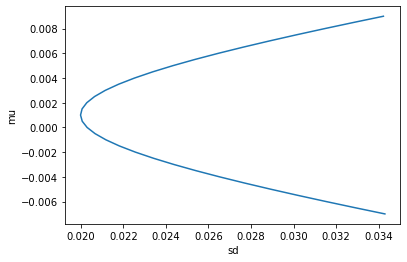

In [27]:
import math
sd = [math.sqrt(weight.iloc[:,i].dot(Cov).dot(weight.iloc[:,i])) for i in range(weight.shape[1])]
import matplotlib.pyplot as plt
plt.plot(sd, mu)
plt.xlabel('sd')
plt.ylabel('mu')

In [31]:
sd_mvp = 1 / math.sqrt(C)
mu_mvp = A / C
weight_mvp = (Cov_inv / C).sum()
print(sd_mvp)
print(mu_mvp)
print(weight_mvp)

0.019983668683295812
0.001012455346797978
1_HK      0.279867
5_HK      0.257853
386_HK   -0.063604
700_HK    0.070125
941_HK    0.455759
dtype: float64


In [29]:
# MVP with risk-free asset
mu_rf = 0.0002
K = B - 2 * A * mu_rf + C * mu_rf ** 2
sd1 = [0 + i * 0.01 for i in range(19)]
mu1 = [mu_rf + sd * math.sqrt(K) for sd in sd1]
mu2 = [mu_rf - sd * math.sqrt(K) for sd in sd1]
weight1 = pd.DataFrame()
weight2 = pd.DataFrame()
for mu in mu1:
    weight1 = pd.concat([weight1, Cov_inv.dot(exprtn - mu_rf) * (mu - mu_rf) / K], axis = 1)

for mu in mu2: 
    weight2 = pd.concat([weight2, Cov_inv.dot(exprtn - mu_rf) * (mu - mu_rf) / K], axis = 1)

Text(0, 0.5, 'mu')

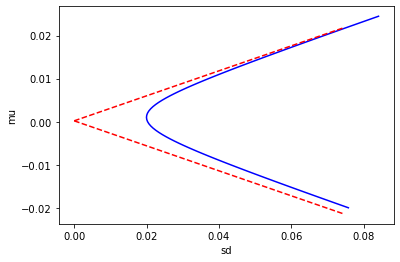

In [30]:
mu = [-0.02 + i * 0.0005 for i in range(90)]
weight = pd.DataFrame()
for i in range(len(mu)):
    weight = pd.concat([weight, h + g * mu[i]], axis = 1)
sd = [math.sqrt(weight.iloc[:, i].dot(Cov).dot(weight.iloc[:, i])) for i in range(weight.shape[1])]
X = [0 + 0.0005 * i for i in range(150)]
plt.plot(sd, mu, 'b-', X, [mu_rf + x * math.sqrt(K) for x in X], 'r--', X, [mu_rf - x * math.sqrt(K) for x in X], 'r--')
plt.xlabel('sd')
plt.ylabel('mu')